In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 统计分析:
# 集中趋势度量 -> 算数平均数 位置平均数
# 离中趋势度量  -> 极差 方差 标准差 分位差 离散系数

In [4]:
data = pd.DataFrame({"value":np.random.randint(100, 120, 100),
                    'f':np.random.rand(100)})

In [5]:
data

value         f
0     101  0.541074
1     115  0.929800
2     108  0.682434
3     111  0.924557
4     116  0.046662
..    ...       ...
95    104  0.575591
96    102  0.074805
97    100  0.836647
98    107  0.884589
99    109  0.722677

[100 rows x 2 columns]

In [6]:
# f 权重 
data['f'] = data['f'] / data['f'].sum()

In [16]:
mean = data['value'].mean()  # 没有权重的 平均值
# 总和  / 样本数量

In [10]:
# 加权算数平均值: = (x1f1 + x2f2 + ..... + xnfn) / ( f1 + f2 + f3 ..... + fn)
mean_w = (data['value'] * data['f']).sum() / data['f'].sum()

In [12]:
mean_w

109.73955682338503

In [13]:
# 位置平均数
m = data['value'].mode()
# 注意: 返回多个值
print('众数为:{}'.format(m.tolist()))

众数为:[109]


In [14]:
med = data['value'].median()
med

110.0

Text(115.0, 0.02, '中位数:110.0')

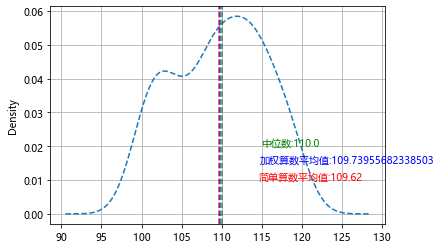

In [26]:
data['value'].plot(kind='kde', style='--', grid=True)  # 密度曲线
plt.axvline(mean, color='r', linestyle='--', alpha=0.8)
plt.text(mean + 5, 0.01, '简单算数平均值:{}'.format(mean), color='r')

plt.axvline(mean_w, color='b', linestyle='--', alpha=0.8)
plt.text(mean_w + 5, 0.015, '加权算数平均值:{}'.format(mean_w), color='b')

plt.axvline(med, color='g', linestyle='--', alpha=0.8)
plt.text(med + 5, 0.02, '中位数:{}'.format(med), color='g')

In [27]:
data = pd.DataFrame({'A_sale':np.random.rand(30)*1000,
                    'B_sale':np.random.rand(30)*1000},
                   index = pd.period_range('20170601','20170630'))

In [28]:
data

A_sale      B_sale
2017-06-01  778.581264  410.688716
2017-06-02  723.806701  908.703196
2017-06-03  988.360920  284.155194
2017-06-04  500.503013  563.821342
2017-06-05  911.983131  795.393024
2017-06-06   83.117771  156.573997
2017-06-07  783.827731  939.863627
2017-06-08  596.894075  252.223774
2017-06-09   66.449139   50.953155
2017-06-10  583.787163  314.457901
2017-06-11  548.797695  261.277787
2017-06-12  259.790126  279.185160
2017-06-13  318.160014   20.053403
2017-06-14  945.064435  173.964268
2017-06-15  920.725744  893.187226
2017-06-16  790.211532  634.027263
2017-06-17  477.680638  687.673027
2017-06-18  914.278817  154.858993
2017-06-19  985.534631  246.437658
2017-06-20  121.387073  800.884410
2017-06-21  254.648513  713.910530
2017-06-22  355.638097  980.306894
2017-06-23  883.323145  387.846743
2017-06-24  142.038532  595.055286
2017-06-25  545.895985  284.273228
2017-06-26  584.492632  205.161246
2017-06-27  362.195425  862.264339
2017-06-28  153.630199  397.369974
2017-06-29  369.658438  662.674418
2017-06-30  632.711680  302.937447

In [30]:
# 离中趋势度量
#  方差 -> 各组中数值与算数平均数差平方的算术平均数
# 标准差 -> 方差的平方根  -> 标准差越大  离中趋势越明显
a_r = data['A_sale'].max() - data['A_sale'].min()
b_r = data['B_sale'].max() - data['B_sale'].min()

sta = data['A_sale'].describe() #  25 50 75
stb = data['B_sale'].describe()

# 分位差
a_iqr = sta.loc['75%'] - sta.loc['25%']
b_iqr = stb.loc['75%'] - stb.loc['25%']

In [31]:
a_iqr

461.08604693719957

In [32]:
b_iqr

452.8638770448091

<AxesSubplot:>

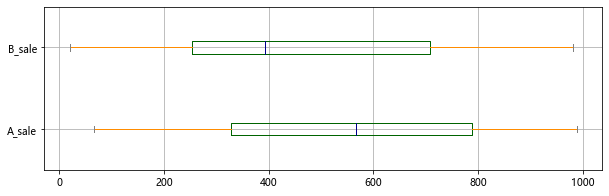

In [35]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
data.plot.box(grid=True, color=color, figsize=(10, 3), vert=False)

In [36]:
sta

count     30.000000
mean     552.772475
std      296.746678
min       66.449139
25%      327.529535
50%      566.292429
75%      788.615582
max      988.360920
Name: A_sale, dtype: float64

In [37]:
stb

count     30.000000
mean     474.006108
std      291.504418
min       20.053403
25%      254.487277
50%      392.608359
75%      707.351154
max      980.306894
Name: B_sale, dtype: float64

In [38]:
a_std = sta.loc['std']
b_std = stb.loc['std']

# 方差
a_var = data['A_sale'].var()
b_var = data['B_sale'].var()

In [39]:
a_var

88058.59100887245

In [41]:
data

A_sale      B_sale
2017-06-01  778.581264  410.688716
2017-06-02  723.806701  908.703196
2017-06-03  988.360920  284.155194
2017-06-04  500.503013  563.821342
2017-06-05  911.983131  795.393024
2017-06-06   83.117771  156.573997
2017-06-07  783.827731  939.863627
2017-06-08  596.894075  252.223774
2017-06-09   66.449139   50.953155
2017-06-10  583.787163  314.457901
2017-06-11  548.797695  261.277787
2017-06-12  259.790126  279.185160
2017-06-13  318.160014   20.053403
2017-06-14  945.064435  173.964268
2017-06-15  920.725744  893.187226
2017-06-16  790.211532  634.027263
2017-06-17  477.680638  687.673027
2017-06-18  914.278817  154.858993
2017-06-19  985.534631  246.437658
2017-06-20  121.387073  800.884410
2017-06-21  254.648513  713.910530
2017-06-22  355.638097  980.306894
2017-06-23  883.323145  387.846743
2017-06-24  142.038532  595.055286
2017-06-25  545.895985  284.273228
2017-06-26  584.492632  205.161246
2017-06-27  362.195425  862.264339
2017-06-28  153.630199  397.369974
2017-06-29  369.658438  662.674418
2017-06-30  632.711680  302.937447

In [42]:
# 二八定律 ->帕累托分析
# 原因与结果   投入与产出 .....
# 寻找那个20% 因素

In [43]:
data = pd.Series(np.random.randn(10)*1200+3000,
                index = list('ABCDEFGHIJ'))

In [44]:
data

A    3262.729853
B    2333.192375
C    2614.322881
D    4674.233933
E    4110.968778
F    2647.721240
G    4924.622007
H    3162.768942
I    1909.381464
J    3753.563305
dtype: float64

In [45]:
data.sort_values(ascending=False, inplace=True)

In [46]:
data

G    4924.622007
D    4674.233933
E    4110.968778
J    3753.563305
A    3262.729853
H    3162.768942
F    2647.721240
C    2614.322881
B    2333.192375
I    1909.381464
dtype: float64

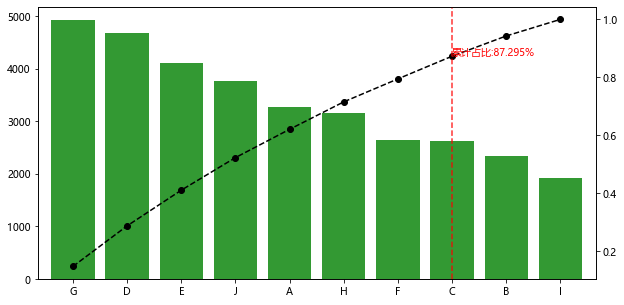

In [50]:
plt.figure(figsize=(10, 5))
data.plot(kind='bar', color='g', alpha=0.8, width=0.8)
p = data.cumsum() / data.sum()
key = p[p>0.8].index[0] # 超过80%累计占比的节点值索引
key_num = data.index.tolist().index(key) 

p.plot(style='--ko', secondary_y=True)
plt.axvline(key_num, color='r', linestyle='--', alpha=0.8)
plt.text(key_num, p[key], '累计占比:%.3f%%' % (p[key] * 100), color='r')

key1 = data.loc[:key]

In [51]:
key1

G    4924.622007
D    4674.233933
E    4110.968778
J    3753.563305
A    3262.729853
H    3162.768942
F    2647.721240
C    2614.322881
dtype: float64

In [58]:
# 正态性校验
s = pd.DataFrame(np.random.randn(1000)+10,columns = ['value'])

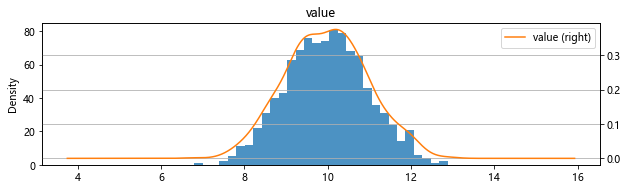

In [59]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(2, 1, 1)
s.hist(bins=30, alpha=0.8, ax=ax1)
s.plot(kind='kde', secondary_y=True, ax=ax1)
plt.grid()

In [65]:
mean = s['value'].mean()
std = s['value'].std()

s.sort_values(by='value', inplace=True)
s_r = s.reset_index(drop=True)

# 百分位数p[i]  q值
s_r['p'] = (s_r.index-0.5) / len(s_r)
s_r['q'] = (s_r['value'] - mean) / std

st = s['value'].describe()
x1, y1 = 0.25, st['25%'] # 四分之一分位数
x2, y2 = 0.75, st['75%'] # 四分之三

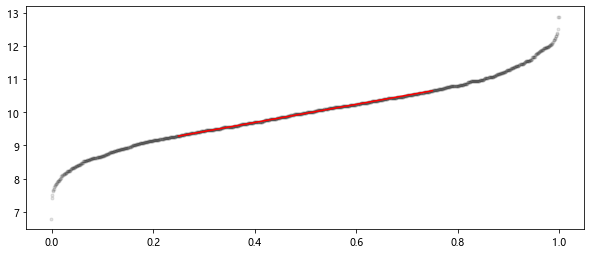

In [67]:
fig = plt.figure(figsize=(10, 9))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(s_r['p'], s_r['value'], 'k.', alpha=0.1)
ax1.plot([x1, x2], [y1, y2], '-r')

In [76]:
# KS
from scipy import stats # 科学运算
data = [0.1, 0.01, 50000, 1000, 11]

In [77]:
df = pd.DataFrame(data, columns=['value'])
u = df['value'].mean()
std = df['value'].std()
stats.kstest(df['value'], 'norm', (u, std))
#  statistic  D值
# pvalue p值  大于0.05 正太分布

KstestResult(statistic=0.4603978722758565, pvalue=0.1742837548239774)

In [78]:
# 相关性分析: 分析连续变量之间线性相关程度强弱
# 图表 / Pearson相关系数 / Sperman相关系数
data1 = pd.Series(np.random.rand(50)*100).sort_values()
data2 = pd.Series(np.random.rand(50)*50).sort_values()
data3 = pd.Series(np.random.rand(50)*500).sort_values(ascending = False)

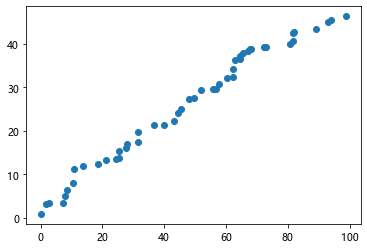

In [79]:
plt.scatter(data1, data2) # 正

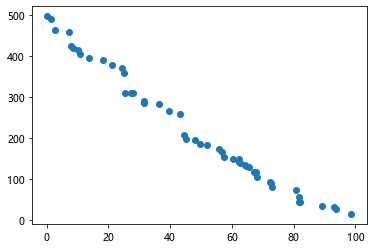

In [81]:
plt.scatter(data1, data3) # 负

In [82]:
data = pd.DataFrame(np.random.randn(200, 4) * 100, columns=list('ABCD'))

In [83]:
data

A           B           C           D
0      5.602525 -207.318564    4.359447  197.737975
1    130.173902  -47.228714  -33.755453  287.179338
2    -31.628678  -28.551322 -103.473765  112.364230
3     72.222660  405.287499   38.529220   22.242043
4   -115.605492   53.129317  -97.708053   29.107099
..          ...         ...         ...         ...
195    6.920414 -102.912274 -194.663351  -66.289684
196   13.958941   29.085422   -4.785781   94.534746
197  -40.911431   12.286064   74.238708 -105.360489
198 -120.455771  -65.387920   71.578774   22.907851
199  104.171249  -66.558277 -134.968964   53.717803

[200 rows x 4 columns]

array([[<AxesSubplot:xlabel='A', ylabel='A'>,
        <AxesSubplot:xlabel='B', ylabel='A'>,
        <AxesSubplot:xlabel='C', ylabel='A'>,
        <AxesSubplot:xlabel='D', ylabel='A'>],
       [<AxesSubplot:xlabel='A', ylabel='B'>,
        <AxesSubplot:xlabel='B', ylabel='B'>,
        <AxesSubplot:xlabel='C', ylabel='B'>,
        <AxesSubplot:xlabel='D', ylabel='B'>],
       [<AxesSubplot:xlabel='A', ylabel='C'>,
        <AxesSubplot:xlabel='B', ylabel='C'>,
        <AxesSubplot:xlabel='C', ylabel='C'>,
        <AxesSubplot:xlabel='D', ylabel='C'>],
       [<AxesSubplot:xlabel='A', ylabel='D'>,
        <AxesSubplot:xlabel='B', ylabel='D'>,
        <AxesSubplot:xlabel='C', ylabel='D'>,
        <AxesSubplot:xlabel='D', ylabel='D'>]], dtype=object)

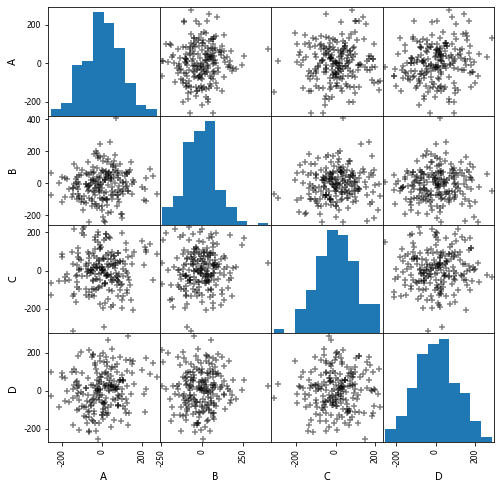

In [86]:
pd.plotting.scatter_matrix(data, figsize=(8, 8), c='k', marker='+', diagonal='hist')

In [95]:
data1 = pd.Series(np.random.rand(100)*100).sort_values()
data2 = pd.Series(np.random.rand(100)*50).sort_values()
data = pd.DataFrame({'value1':data1.values,
                     'value2':data2.values})

In [117]:
data

智商  每周看电视小时数  range1  range2  d1  d2
1   86         0       1       1   0   0
8  112         6       9       2   7  49
0  106         7       7       3   4  16
7  113        12      10       4   6  36
9  110        17       8       5   3   9
6   97        20       2       6  -4  16
2  100        27       4       7  -3   9
4   99        28       3       8  -5  25
5  103        29       6       9  -3   9
3  101        50       5      10  -5  25

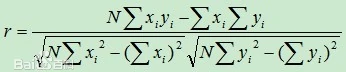

In [89]:
u1, u2 = data['value1'].mean(), data['value2'].mean()
std1, std2 = data['value1'].std(), data['value2'].std()
print(stats.kstest(data['value1'], 'norm', (u1, std1)))
print(stats.kstest(data['value2'], 'norm', (u2, std2)))

KstestResult(statistic=0.0775831388074728, pvalue=0.5574418160891085)
KstestResult(statistic=0.09301593815004783, pvalue=0.33177494370520844)


In [90]:
data['(x-u1) * (y-u2)'] = (data['value1'] - u1) * (data['value2'] - u2)
data['(x-u1) ** 2'] = (data['value1'] - u1) ** 2
data['(x-u2) ** 2'] = (data['value2'] - u2) ** 2
# Pearson 相关系数求值表

In [92]:
# 求 r > 0.8  高度线性相关
r = data['(x-u1) * (y-u2)'].sum() / (np.sqrt(data['(x-u1) ** 2'].sum() * data['(x-u2) ** 2'].sum()))

In [93]:
r

0.9973929789276599

In [101]:
data.corr(method='spearman')

value1  value2
value1     1.0     1.0
value2     1.0     1.0

In [102]:
# spearman 
data = pd.DataFrame({'智商':[106,86,100,101,99,103,97,113,112,110],
                    '每周看电视小时数':[7,0,27,50,28,29,20,12,6,17]})

In [103]:
data

智商  每周看电视小时数
0  106         7
1   86         0
2  100        27
3  101        50
4   99        28
5  103        29
6   97        20
7  113        12
8  112         6
9  110        17

In [105]:
data.sort_values('智商', inplace=True)
data['range1'] = np.arange(1, len(data) + 1)

In [106]:
data.sort_values('每周看电视小时数', inplace=True)
data['range2'] = np.arange(1, len(data) + 1)  # 秩次索引

In [107]:
data

智商  每周看电视小时数  range1  range2
1   86         0       1       1
8  112         6       9       2
0  106         7       7       3
7  113        12      10       4
9  110        17       8       5
6   97        20       2       6
2  100        27       4       7
4   99        28       3       8
5  103        29       6       9
3  101        50       5      10

In [108]:
data['d1'] = data['range1'] - data['range2']
data['d2'] = data['d1'] ** 2

In [114]:
data

智商  每周看电视小时数  range1  range2  d1  d2
1   86         0       1       1   0   0
8  112         6       9       2   7  49
0  106         7       7       3   4  16
7  113        12      10       4   6  36
9  110        17       8       5   3   9
6   97        20       2       6  -4  16
2  100        27       4       7  -3   9
4   99        28       3       8  -5  25
5  103        29       6       9  -3   9
3  101        50       5      10  -5  25

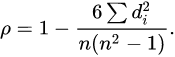

In [115]:
n = len(data)
rs = 1 - 6 * (data['d2'].sum()) / (n * (n ** 2 - 1))

In [116]:
rs

-0.17575757575757578

In [113]:
data.corr(method='spearman')

智商  每周看电视小时数    range1    range2        d1        d2
智商        1.000000 -0.175758  1.000000 -0.175758  0.713428  0.518607
每周看电视小时数 -0.175758  1.000000 -0.175758  1.000000 -0.786600  0.024696
range1    1.000000 -0.175758  1.000000 -0.175758  0.713428  0.518607
range2   -0.175758  1.000000 -0.175758  1.000000 -0.786600  0.024696
d1        0.713428 -0.786600  0.713428 -0.786600  1.000000  0.192561
d2        0.518607  0.024696  0.518607  0.024696  0.192561  1.000000